# Airbnb New York City
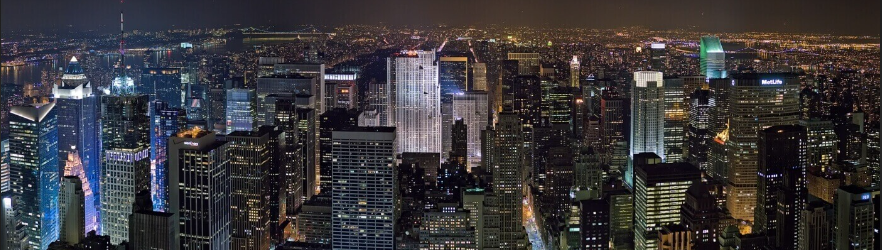

# Desafio Ciência de Dados Lighthouse
#### Situação:
Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de `criação de uma plataforma de aluguéis temporários na cidade de Nova York`. 
#### Objetivo:
- Desenvolver uma estratégia de precificação.

#### Passos e Perguntas a serem respondidas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!


2. Responda também às seguintes perguntas:
    - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
    - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
    - Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    
    
3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


4. Supondo um apartamento com as seguintes características:

`{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}`

   Qual seria a sua sugestão de preço?
   
   
5. Salve o modelo desenvolvido no formato .pkl. 


6. A entrega deve ser feita através de um repositório de código público que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.


## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport
import folium 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import xgboost
import warnings
warnings.filterwarnings("ignore")

## Importando a Base de Dados

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')
display(df)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
colunas = ['bairro_group', 'bairro', 'room_type']
for coluna in colunas:
    print(f'Tipos na coluna: {coluna}\n\n{df[coluna].value_counts()}')
    print('-'*30)

Tipos na coluna: bairro_group

Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64
------------------------------
Tipos na coluna: bairro

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: bairro, Length: 221, dtype: int64
------------------------------
Tipos na coluna: room_type

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64
------------------------------


In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percentual = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

conjunto = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'], sort=False).sort_values('Total', ascending=False)
conjunto.head(20)

,Total,Percentual
ultima_review,10052,0.205588
reviews_por_mes,10052,0.205588
host_name,21,0.000430
nome,16,0.000327
id,0,0.000000
host_id,0,0.000000
bairro_group,0,0.000000
bairro,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


### Visuzalização gráfica dos valores vazios

<Axes: >

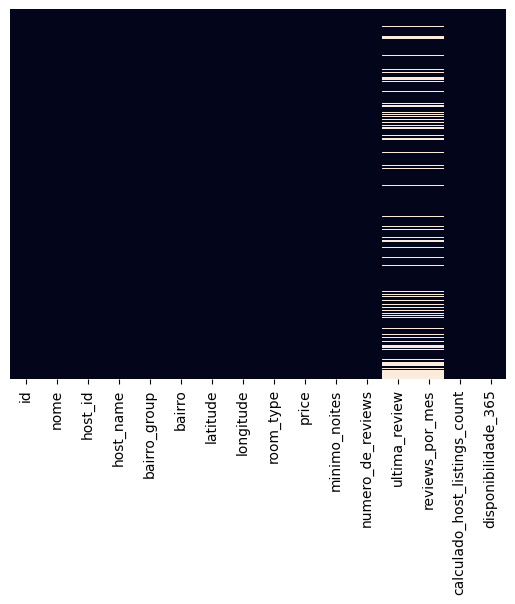

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
# A parte mais clara representa os valores vazios

- As linhas com valores vazios nas coluans, host_name e nome, posso excluir já que é um número muito baixo e não tem necessidade de preencher, o que pode até piorar. 
- Valores Nan na coluna de "reviews_por_mes" significa que o imóvel não possui nenhuma avaliação até o momento. Então vou substituir por 0.

In [7]:
df.dropna(subset=['host_name', 'nome'], inplace=True) #excluindo valores vazios nas colunas host_name e nome

In [8]:
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [9]:
df.isnull().sum().sort_values(ascending=False)

ultima_review                    10037
id                                   0
nome                                 0
host_id                              0
host_name                            0
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

- Se caso eu quisesse substituir os valores NaN da coluna "reviews_por_mes" pela sua média de acordo com o "room_type" e "bairro_group", poderia fazer assim:

In [10]:
media_reviews = df.loc[:, ['reviews_por_mes', 'room_type', 'bairro_group']].groupby(['bairro_group', 'room_type']).mean()
display(media_reviews)

reviews_por_mes
bairro_group  room_type                       
Bronx         Entire home/apt         1.826376
              Private room            1.319371
              Shared room             0.985254
Brooklyn      Entire home/apt         1.125236
              Private room            0.991595
              Shared room             0.752010
Manhattan     Entire home/apt         0.862452
              Private room            1.144347
              Shared room             1.329646
Queens        Entire home/apt         1.635038
              Private room            1.548947
              Shared room             1.169091
Staten Island Entire home/apt         1.767955
              Private room            1.437074
              Shared room             0.740000

## Entendendo os Dados EDA

In [11]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.885700e+04,4.885700e+04,48857.000000,48857.00000,48857.000000,48857.000000,48857.000000,48857.000000,48857.000000,48857.000000
mean,1.902374e+07,6.763307e+07,40.728943,-73.95217,152.740385,7.012567,23.273390,1.091142,7.148392,112.796263
std,1.098267e+07,7.862410e+07,0.054527,0.04616,240.234843,20.019944,44.550307,1.597281,32.964937,131.607363
min,2.595000e+03,2.438000e+03,40.499790,-74.24442,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.476198e+06,7.821383e+06,40.690090,-73.98307,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969118e+07,3.079133e+07,40.723070,-73.95568,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915779e+07,1.074344e+08,40.763110,-73.93628,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.71299,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Distribuição dos preços dos imóveis em NY

Text(0.5, 1.0, 'Distribuição dos preços')

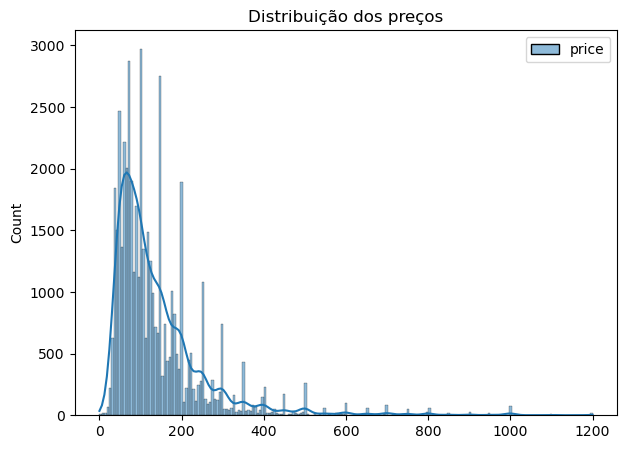

In [12]:
plt.figure(figsize=(7, 5))
preco = df.loc[df['price']<=1200, :][['price']]
sns.histplot(preco, color='green', kde=True)
plt.title('Distribuição dos preços')

Pelo gráfico acima, podemos ver que a maioria dos imóveis gira em torno de $150.

### Média e desvio padrão dos imóveis de NY

In [13]:
print('A média de aluguel em NY é: US${:,.2f}'.format(df.price.mean()))
print('O desvio padrão é: US${:,.2f}'.format(df.price.std()))

A média de aluguel em NY é: US$152.74
O desvio padrão é: US$240.23


- O desvio padrão mostra que o preço mais alto deve estar em torno de 392.00 dólares e o menor em quase 0.

In [14]:
print(df.price.min())

0


### Média | Desvio padrão | máximo | mínino dos preços de acordo com "bairro_group"

In [15]:
df.groupby('bairro_group')['price'].agg(['mean', 'std', 'max', 'min'])

,mean,std,max,min
bairro_group,,,,
Bronx,87.469238,106.798933,2500,0
Brooklyn,124.409299,186.941267,10000,0
Manhattan,196.897473,291.489822,10000,0
Queens,99.536017,167.128794,10000,10
Staten Island,114.812332,277.620403,5000,13


### Média dos preços por grupo de bairros em NY

In [16]:
media_preco_gb = df.loc[:, ['bairro_group', 'price']].groupby('bairro_group').mean()
display(media_preco_gb)

,price
bairro_group,
Bronx,87.469238
Brooklyn,124.409299
Manhattan,196.897473
Queens,99.536017
Staten Island,114.812332


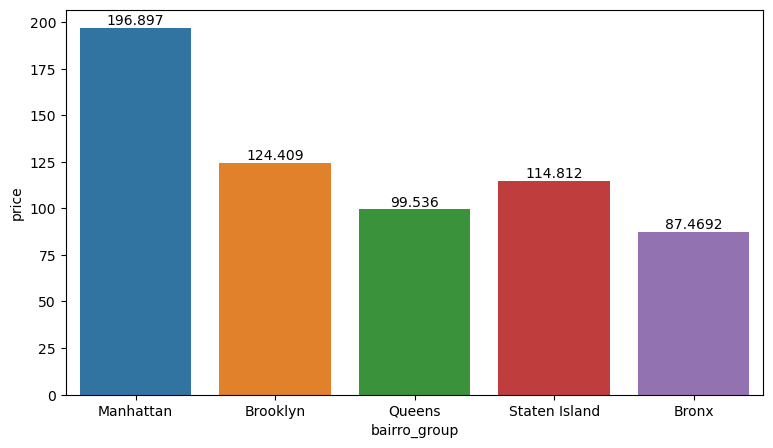

In [17]:
plt.figure(figsize=(9, 5))
x = sns.barplot(x="bairro_group", y='price', hue="bairro_group", errorbar=None, data=df)
for container in x.containers:
    x.bar_label(container)
plt.show()

- A média dos preços em Manhattan é alta em relação aos demais bairros.

### Média dos preços por tipo de quarto em NY

In [18]:
media_preco_room_type = df.loc[:, ['room_type', 'price']].groupby('room_type').mean()
display(media_preco_room_type)

,price
room_type,
Entire home/apt,211.806994
Private room,89.791706
Shared room,70.075928


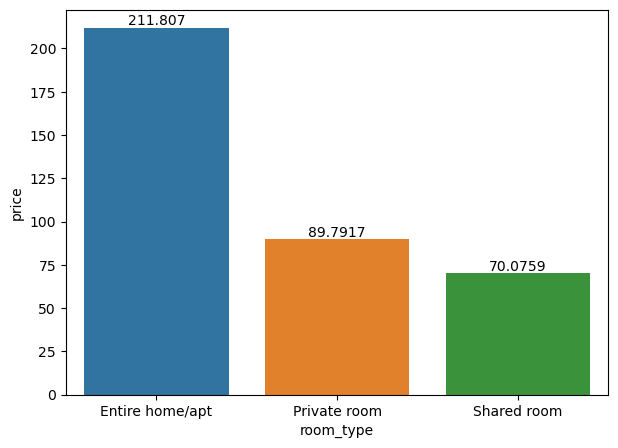

In [19]:
plt.figure(figsize=(7, 5))
x = sns.barplot(x='room_type', y='price', hue='room_type', errorbar=None, data=df)
for container in x.containers:
    x.bar_label(container)
plt.show()

### Média dos preços de cada tipo de quarto em cada grupo de bairros

In [20]:
media_preco = df.loc[:, ['bairro_group', 'room_type', 'price']].groupby(['bairro_group', 'room_type']).mean()
display(media_preco)

price
bairro_group  room_type                  
Bronx         Entire home/apt  127.645503
              Private room      66.788344
              Shared room       58.610169
Brooklyn      Entire home/apt  178.362609
              Private room      76.503458
              Shared room       50.527845
Manhattan     Entire home/apt  249.238211
              Private room     116.805594
              Shared room       88.977083
Queens        Entire home/apt  147.050573
              Private room      71.776855
              Shared room       69.020202
Staten Island Entire home/apt  173.846591
              Private room      62.292553
              Shared room       57.444444

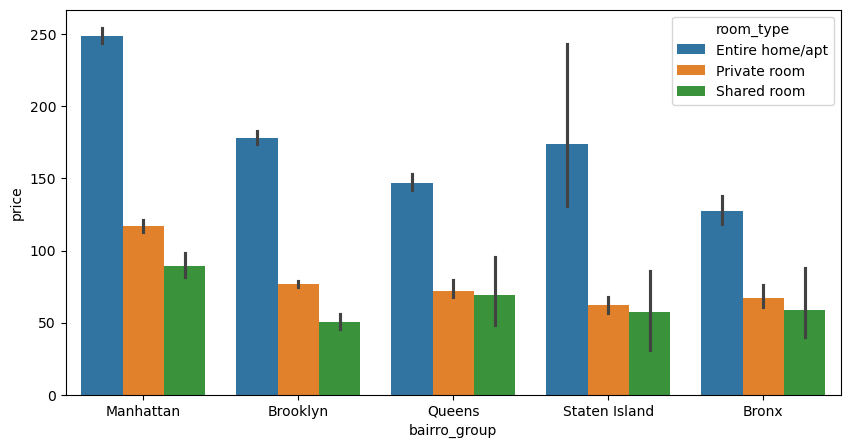

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='bairro_group', y='price', hue ='room_type', data=df)
plt.show()

- Como podemos ver aqui de novo, os preços em Manhattan são mais elevados em comparação com os demais.

### Distribuição dos tipos de quarto para cada grupo de bairro

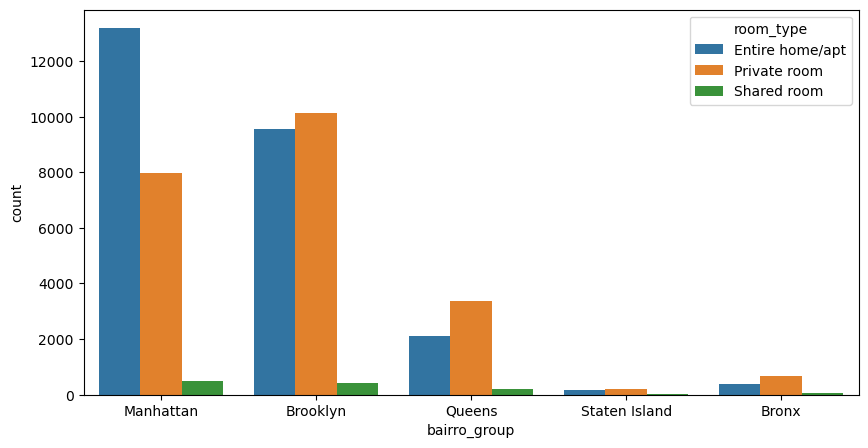

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "bairro_group", hue = "room_type", data = df)
plt.show()

### Quantidade de imóveis por host

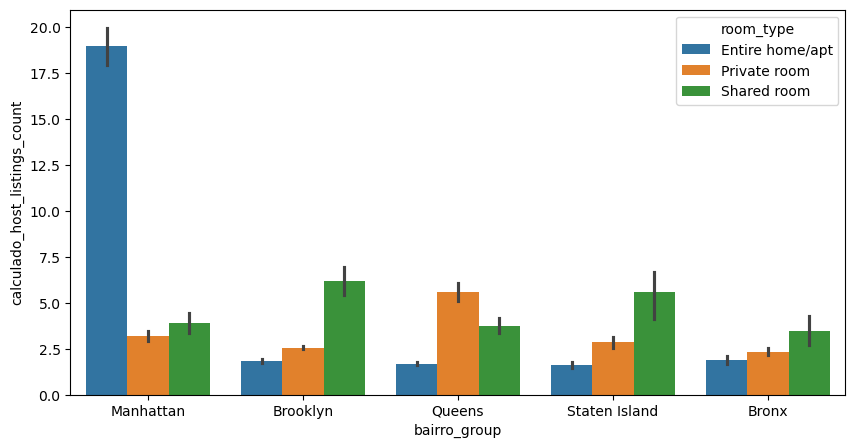

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x="bairro_group", y="calculado_host_listings_count", hue ="room_type", data = df)
plt.show()

### Onde os hosts possuem mais imóveis

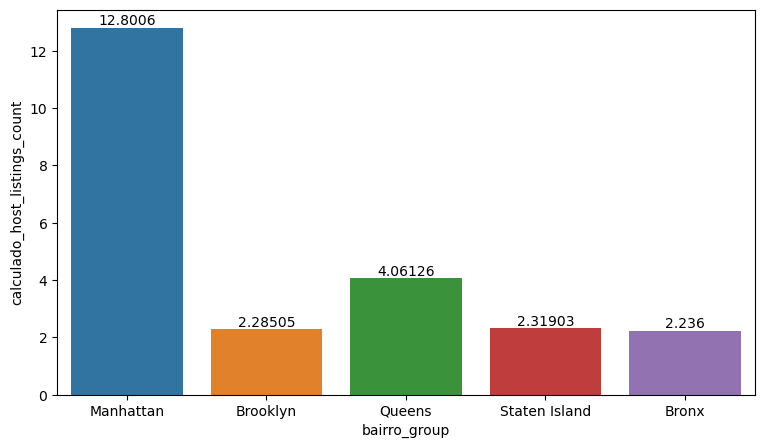

In [24]:
plt.figure(figsize=(9, 5))
x = sns.barplot(x='bairro_group', y='calculado_host_listings_count', hue='bairro_group', errorbar=None, data=df)
for container in x.containers:
    x.bar_label(container)
plt.show()

- Todos os gráficos acima apontam que Manhattan é o bairro mais caro, mas mesmo assim, ele se destaca pela quantidade e preferência das pessoas ao alugarem um imóvel. Como o gráfico acima, os hosts possuem muito mais imóveis em Manhattan, porém tem outro detalhe, os hosts não necessariamente são pessoas comuns, eles podem ser empresas, uma rede comercial de imóveis, o que naturalmente teriam muito mais imóveis alugados por host.
- Sendo assim, com base em uma das perguntas propostas, a previsão será focada mais para pessoas comuns, que possuem entre 1 a 4 imóveis no máximo.

### Quantidade de reviews

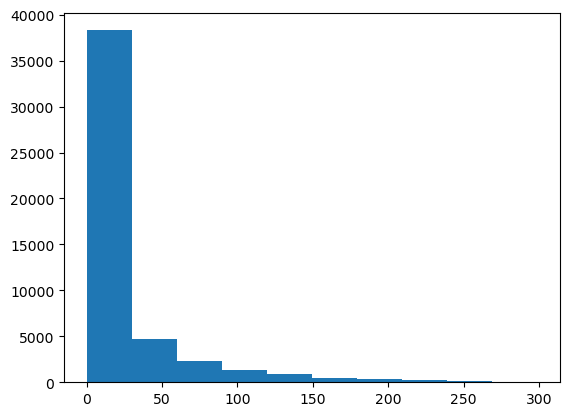

In [25]:
reviews = df.loc[df['numero_de_reviews']<300, :][['numero_de_reviews']]
plt.hist(reviews)
plt.show()

- O número de reviews é muito baixo, mas pode ser o padrão do airbnb.

### Distribuição das colunas numéricas

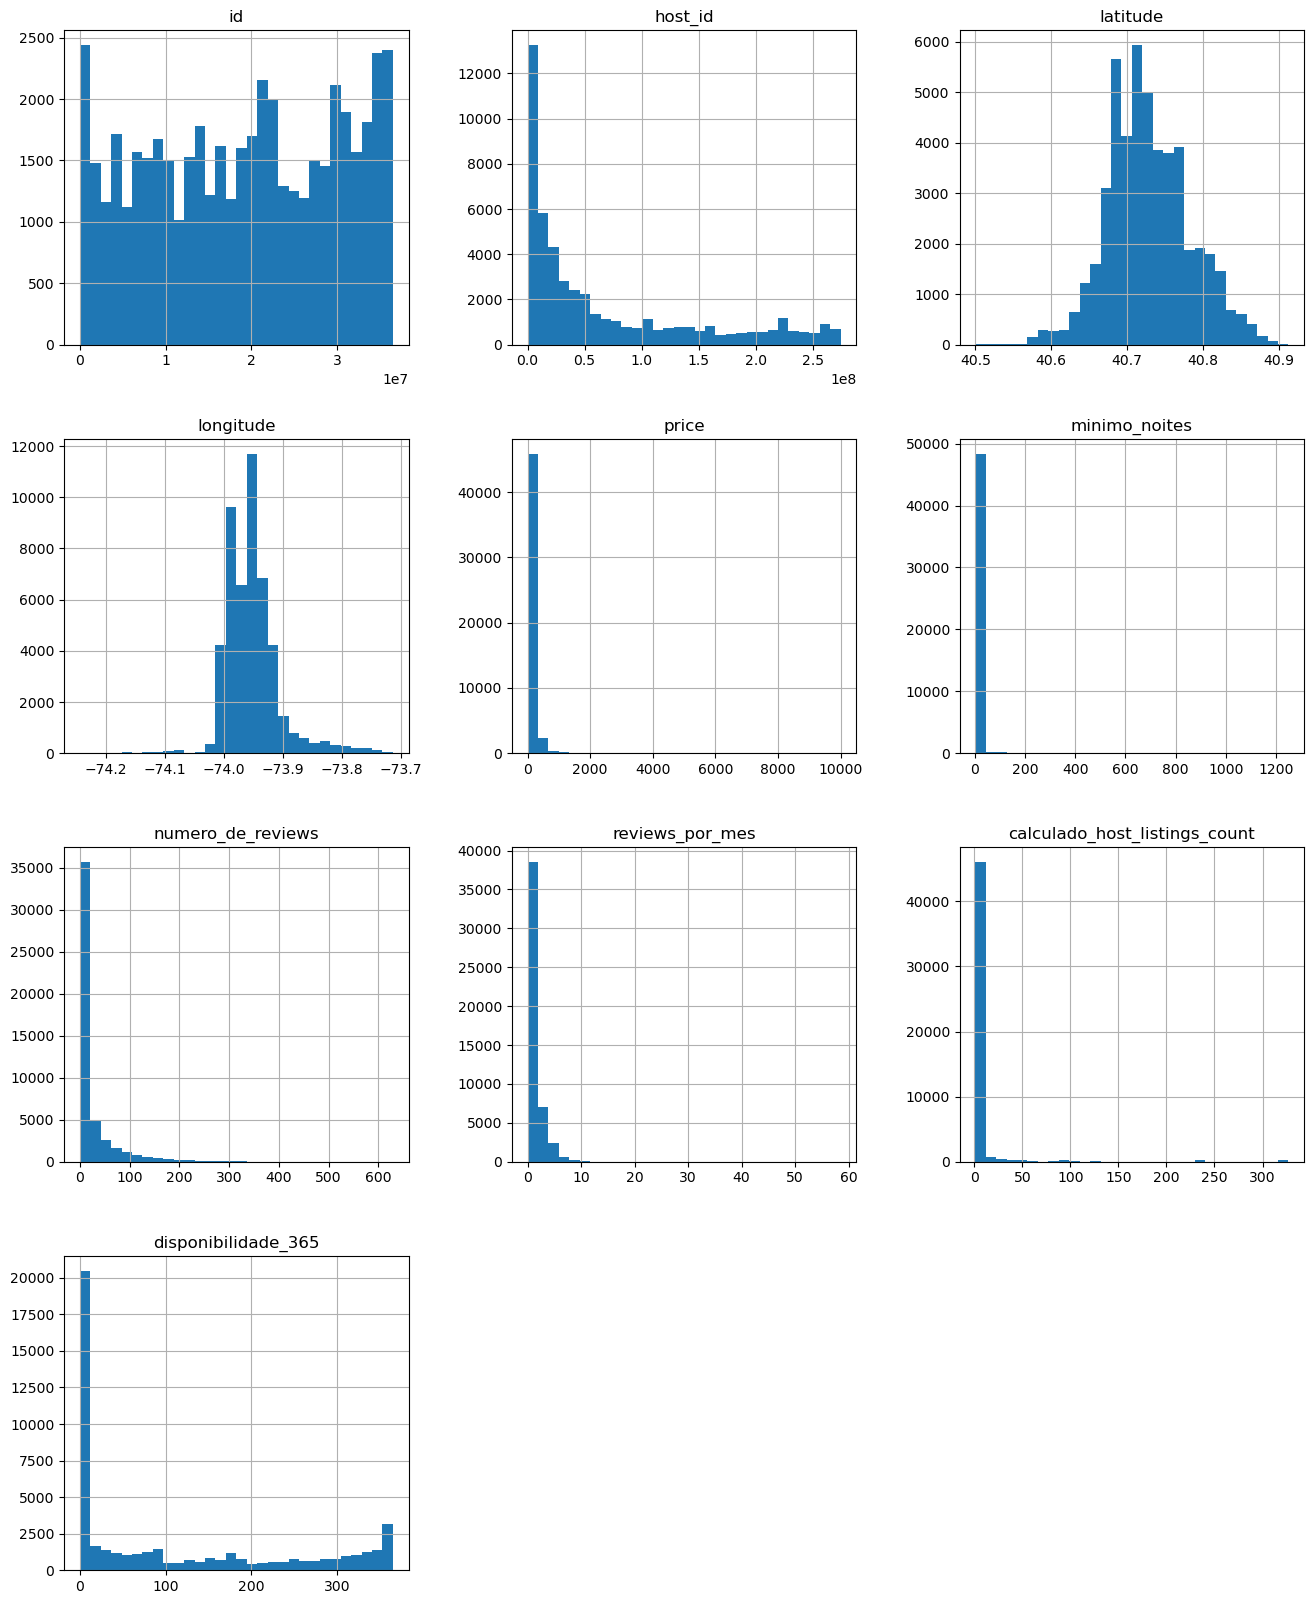

In [26]:
colunas_numericas = df.select_dtypes(include=[np.number])
colunas_numericas.hist(figsize=(16, 20), bins=30)
plt.show()

### Visualização Gráfica de New York

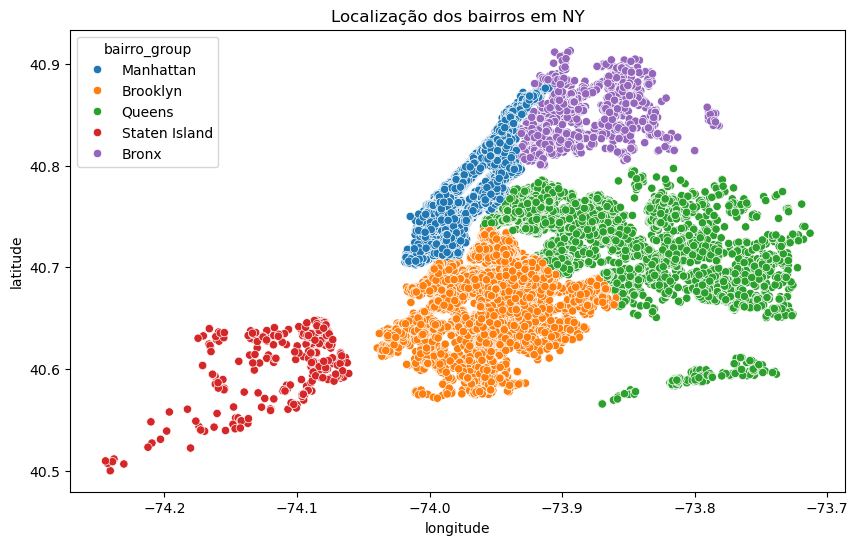

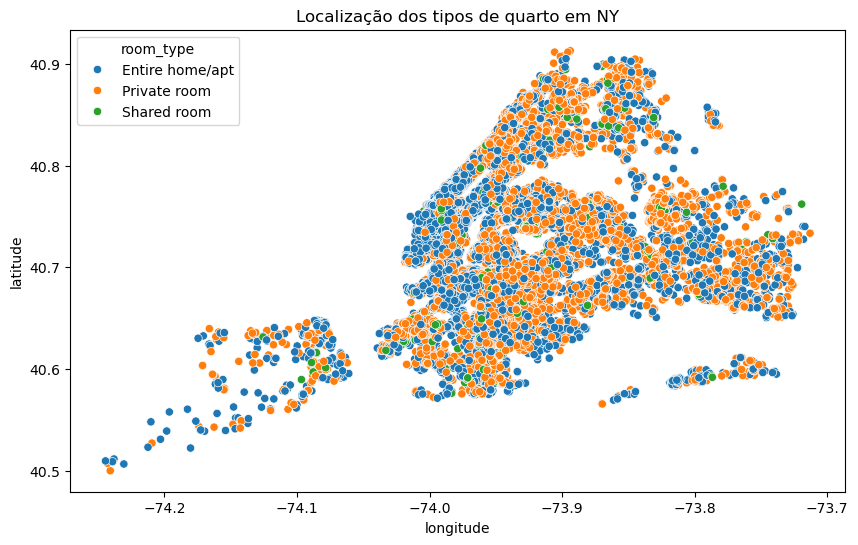

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="bairro_group", data=df)
plt.title("Localização dos bairros em NY")
plt.ioff()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="room_type", data=df)
plt.title("Localização dos tipos de quarto em NY")
plt.ion()

## 1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
- Qual a distribuição dos grupos de bairros?

### Distribuição ''bairro_group''

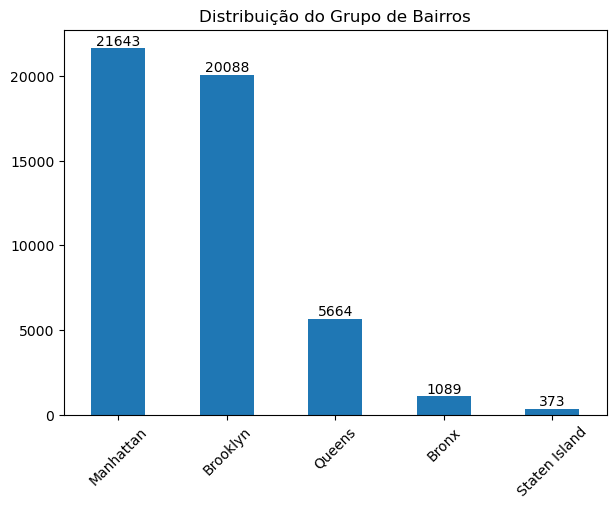

In [28]:
plt.figure(figsize=(7, 5))
ax = df.loc[:, 'bairro_group'].value_counts().sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Distribuição do Grupo de Bairros')
plt.show()

### Distribuição do número de avaliações por grupo de bairros

In [29]:
df.loc[:, ['bairro_group', 'numero_de_reviews']].groupby('bairro_group').sum().sort_values(by='numero_de_reviews', ascending=False)

,numero_de_reviews
bairro_group,
Brooklyn,486165
Manhattan,454126
Queens,156902
Bronx,28334
Staten Island,11541


- Observação: De acordo com o gráfico acima, Brooklyn e Manhattan, tanto são predominantes de acordo com o grupo de bairros, quanto também no número de avaliações. Portanto, as pessoas optam mais por alugar imóveis nesses dois lugares.

### TOP 5 Bairros de Manhattan e Brooklyn

In [30]:
brooklyn = df.loc[df['bairro_group']=='Brooklyn', :]
manhattan = df.loc[df['bairro_group']=='Manhattan', :]
top_brooklyn = brooklyn['bairro'].value_counts().head()
top_manhattan = manhattan['bairro'].value_counts().head()
print('Manhattan:')
display(top_manhattan)
print('-'*30)
print('Brooklyn:')
display(top_brooklyn)

Manhattan:


Harlem             2655
Upper West Side    1969
Hell's Kitchen     1954
East Village       1852
Upper East Side    1797
Name: bairro, dtype: int64

------------------------------
Brooklyn:


Williamsburg          3917
Bedford-Stuyvesant    3713
Bushwick              2462
Crown Heights         1563
Greenpoint            1113
Name: bairro, dtype: int64

- Em Manhattan, o bairro que predominou foi Harlem.
- Em Brooklyn, os bairros que predominaram foram Williamsburg e Bedford-Stuyvesant

### TOP 10 bairros 

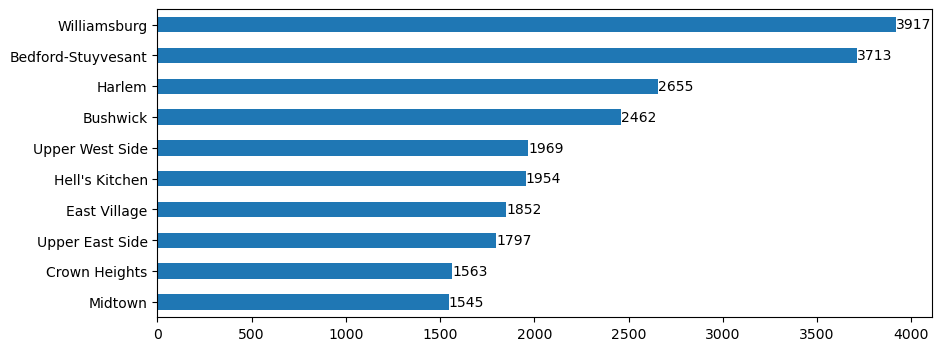

In [31]:
plt.figure(figsize=(10, 4))
ax = df["bairro"].value_counts().head(10).sort_values().plot(kind = "barh")
ax.bar_label(ax.containers[0])
plt.show()

- Podemos ver que  Williamsburg e Bedford-Stuyvesant predominam, mas os preços são favoráveis também?

### Comparando o preço médio nos TOP 1 de Manhattan e Brooklyn

In [32]:
harlem = df.loc[df['bairro']=='Harlem', :]
print('O preço médio em Harlem é ${:.2f}'.format(harlem.price.mean()))

O preço médio em Harlem é $118.95


In [33]:
williamsburg = df.loc[df['bairro']=='Williamsburg', :]
print('O preço médio em Williamsburg é ${:.2f}'.format(williamsburg.price.mean()))

bedford_stuyvesant = df.loc[df['bairro']=='Bedford-Stuyvesant', :]
print('O preço médio em Bedford-Stuyvesant é ${:.2f}'.format(bedford_stuyvesant.price.mean()))

O preço médio em Williamsburg é $143.83
O preço médio em Bedford-Stuyvesant é $107.69


- Bedford-Stuyvesant é o TOP 2 de bairros e o preço médio na região é melhor que no Williamsburg e em Harlem.

### Distribuição de room_type em Manhattan e Brooklyn

In [34]:
manhattan['room_type'].value_counts()

Entire home/apt    13190
Private room        7973
Shared room          480
Name: room_type, dtype: int64

In [35]:
brooklyn['room_type'].value_counts()

Private room       10122
Entire home/apt     9553
Shared room          413
Name: room_type, dtype: int64

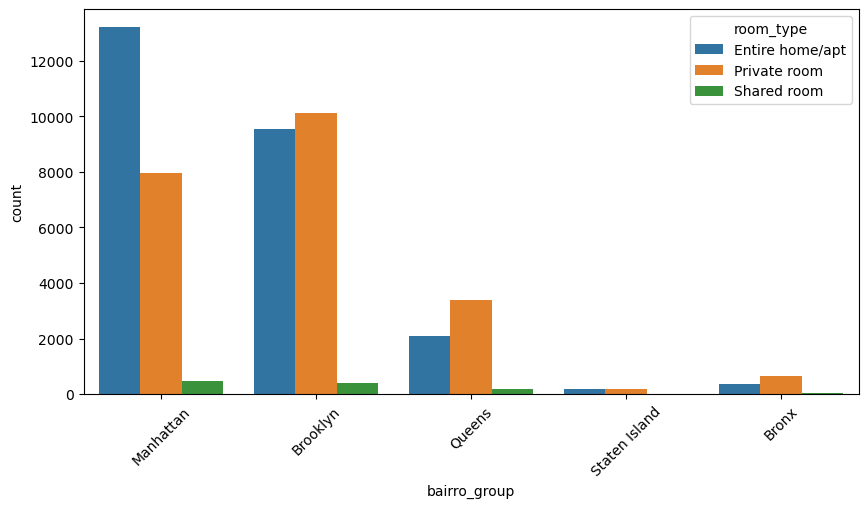

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "bairro_group", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

### Relação de room_type com price em Manhattan e em Brooklyn
- Harlem

In [37]:
harlem = df.loc[df['bairro']=='Harlem', :]
room_type_harlem = harlem.loc[:, ['room_type', 'price']].groupby('room_type').mean()
display(room_type_harlem)

,price
room_type,
Entire home/apt,177.477295
Private room,81.982177
Shared room,68.081633


- Bedford-Stuyvesant

In [38]:
bedford_stuyvesant = df.loc[df['bairro']=='Bedford-Stuyvesant', :]
room_type_bedford_stuyvesant = bedford_stuyvesant.loc[:, ['room_type', 'price']].groupby('room_type').mean()
display(room_type_bedford_stuyvesant)

,price
room_type,
Entire home/apt,154.780641
Private room,73.298478
Shared room,50.376471


### TOP 5 Hosts
Na análise inicial, Manhattan era sempre o que mais de destacava, o que por intuição o melhor lugar para se alugar um imóvel seria em Manhattan. Porém, com a análise acima, os dois bairros que mais aparecem são de Brooklyn.

Sendo assim, o que poderia explicar o porquê de manhattan ser sempre o top 1, seria por exemplo, um único host possuir muitos imóveis. Vamos analisar isso a seguir

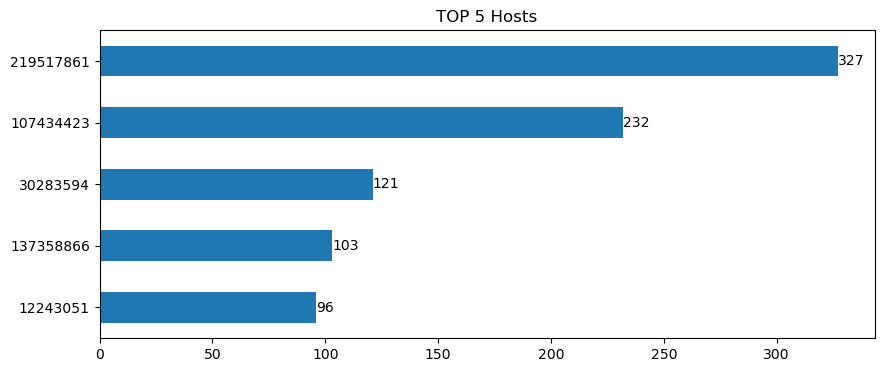

In [39]:
plt.figure(figsize=(10, 4))
ax = df["host_id"].value_counts().head(5).sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.title("TOP 5 Hosts")
plt.show()

### Onde o Host 219517861 possui mais imóveis?

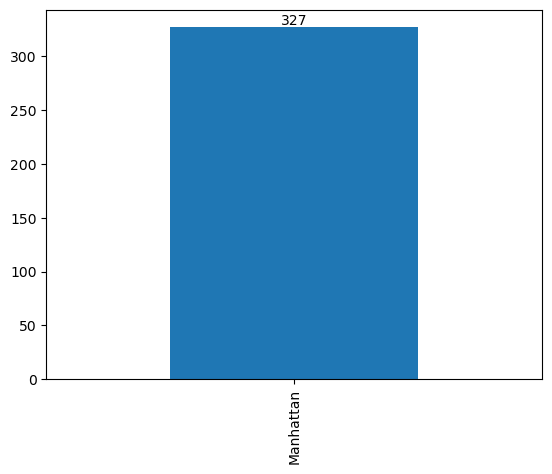

In [40]:
ax = df.loc[df["host_id"]==219517861, :]['bairro_group'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);

### E o segundo Host?

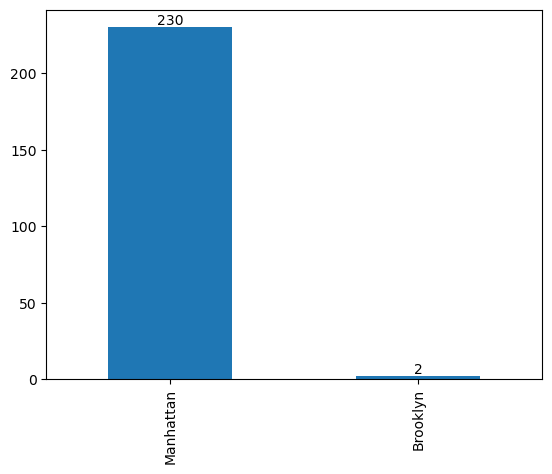

In [41]:
ax = df.loc[df["host_id"]==107434423, :]['bairro_group'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10);

- Por incrível que pareça, todos os imóveis do Host 219517861 ficam em Manhattan, e não só isso, como também podemos ver que segundo host possui praticamente todos os imóveis em Manhattan. Então a nossa hipótese do motivo de Manhattan sempre ser o TOP 1 estava certa. 

#### Conclusão
Com base nas análises acima, supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, Brooklyn - Bedford_Stuyvesant seria o lugar mais indicado a compra. Brooklyn - Bedford_Stuyvesant é o segundo lugar mais escolhido pelas pessoas. A média de preços em Brooklyn é de `$124.41`, e em Bedford_Stuyvesant a média é de `$107.69`. Além disso, acima podemos ver que em relação ao custo de imóveis por tipo de quarto em Manhattam-Harlem e em Brooklyn - Bedford_Stuyvesant, este é muito mais favorável e acessível.

Em Bedford_Stuyvesant a opção mais escolhida é a private room.
A média de preços em NY para Private room é de `$89.79`, sendo que em Brooklyn - Bedford_Stuyvesant, o preço médio para o mesmo tipo de quarto é de `$73.30`.

## 2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
-----------------------------------------------------------------------------------------------------------------------------
### Mínimo de noites e disponibilidade ao longo do ano

In [42]:
# máximo de noites que pode ser agendado
df.minimo_noites.max()

1250

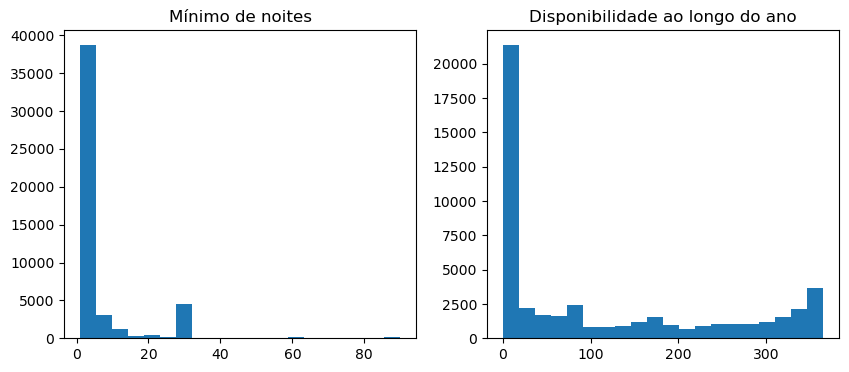

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
min_noites = df.loc[df['minimo_noites']<=90, :][['minimo_noites']]
disp_365 = df.loc[df["disponibilidade_365"]<=365, :][["disponibilidade_365"]]

axs[0].hist(min_noites, bins=20)
axs[0].set_title('Mínimo de noites')
axs[1].hist(disp_365, bins=20)
axs[1].set_title('Disponibilidade ao longo do ano')
plt.show()

- Podemos ver que a maioria prefere alugar por cinco a sete dias, e depois há uma concentração de pessoas que alugam mensalmente, por 30 dias, podem ser pessoas locais. 
- Na distribuição ao longo do ano, majoritariamente as pessoas preferem alugar por períodos mais curtos, mensalmente por exemplo.

### Correlação das colunas com a coluna "price"

In [44]:
correlacao = df.corr()
print(correlacao['price'].sort_values(ascending=False))

price                            1.000000
disponibilidade_365              0.081821
calculado_host_listings_count    0.057460
minimo_noites                    0.042804
latitude                         0.033945
host_id                          0.015327
id                               0.010564
numero_de_reviews               -0.047949
reviews_por_mes                 -0.050586
longitude                       -0.149954
Name: price, dtype: float64


<Axes: >

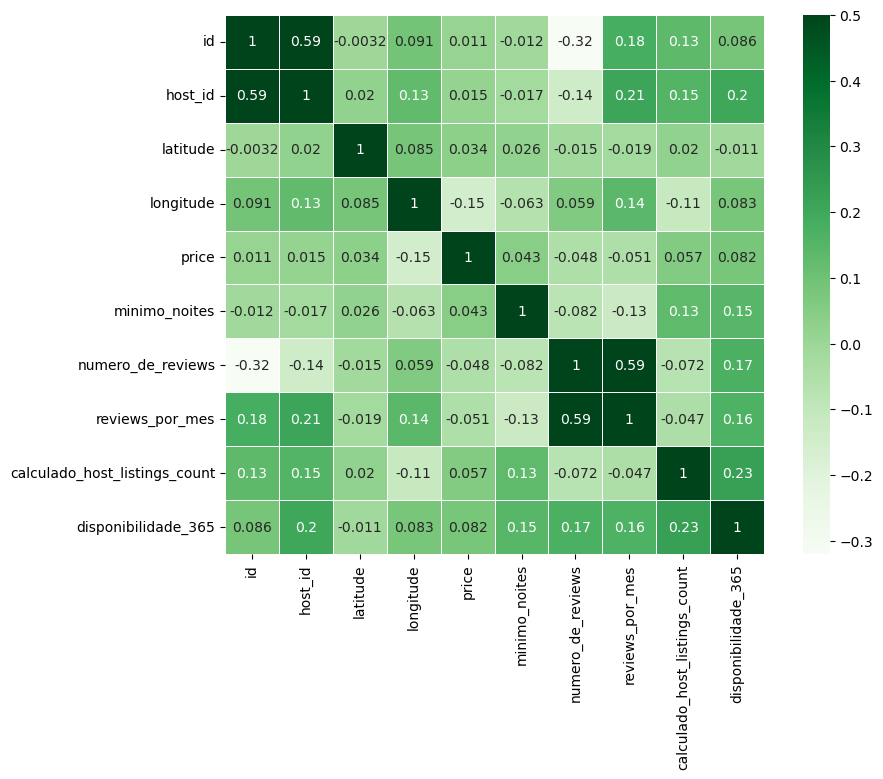

In [45]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlacao, square=True, vmax=0.5, cmap='Greens', linewidth=.5, annot=True)

- Embora a correlação das colunas "minimo_noites" e "disponibilidade_365" sejam altas em comparação com o restante, essa correlação ainda é baixa, portanto, não interfere muito no preço dos imóveis em New York.

## Existe algum padrão no texto do nome do bairro para lugares de mais alto valor?

In [46]:
display(df.head())

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


- Por uma percepção rápida, o que se repete é a palavra "Hill" nos nomes dos bairros, como "Clinton Hill" e "Murray Hill".

In [47]:
df.bairro.unique()

array(['Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'Chinatown', 'South Slope', 'West Village', 'Williamsburg',
       'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Astoria', 'Kensing

- Os que mais se repetem são: Hills / Heights / District

#### Média de preços por bairro

In [48]:
df.loc[:, ['price', 'bairro']].groupby('bairro').mean().sort_values(by='price', ascending=False).head(20)

,price
bairro,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.086957
Flatiron District,341.925000
Randall Manor,336.000000


- Não existe relação do nome do bairro com o preço. Se existesse alguma relação, apareceria na tabela da média dos preços por filtrada por bairro. 
- Agora vamos ver pelo nome do local.

## Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [49]:
print(f"O total de locais é: {df.nome.count()}")
print(f"O total de locais únicos é: {df.nome.nunique()}")

O total de locais é: 48857
O total de locais únicos é: 47883


#### Quais são as palavras que mais de repetem no nome dos locais mais caros

In [50]:
# locais com o preço mais elevado
locais_caros = df.loc[:, ['price', 'nome']].sort_values(by='price', ascending=False).head(100)

In [51]:
import string 
pontuacao = string.punctuation
pontuacao += '0123456789'
lista_string = ['the', 'in', 'on', 'at', 'a', 'an', 'is', 'and', 'to', 'of', 'by', 'for', 'with', 'airbnb)']

dic = []
total = dict(pd.Series(' '.join(locais_caros['nome']).lower().split()).value_counts())
for chave, valor in total.items():
    if (chave not in pontuacao) and (chave not in lista_string):
        x = {chave: valor}
        dic.append(x)

In [52]:
dic[:20]

[{'luxury': 13},
 {'bedroom': 12},
 {'apartment': 10},
 {'townhouse': 9},
 {'park': 8},
 {'(hidden': 7},
 {'private': 7},
 {'west': 7},
 {'loft': 6},
 {'room': 6},
 {'beautiful': 6},
 {'manhattan': 6},
 {'nyc': 5},
 {'chelsea': 5},
 {'brooklyn': 5},
 {'east': 5},
 {'location': 5},
 {'penthouse': 5},
 {'space': 5},
 {'village': 4}]

- Existe sim um padrão no texto do nome do local para lugares de mais alto valor. Filtrei o dataframe pela coluna "nome" e coloquei em ordem do mais caro para o mais barato. Depois filtrei mais uma vez pegando as palavras que mais se repetem no nome desses locais. 


- Sendo assim, as palavras que mais se repetem em lugares de mais alto valor são:

    - `luxury`;
    - `apartment`;
    - `townhouse`(Pelo google: Estilo quando duas ou mais casas são ligadas umas às outras, dividindo proporcionalmente e simetricamente o mesmo terreno ou lote);
    - `penthouse`(Pelo google: Construção feita no topo de prédios com vista panorâmica, que seria a famosa cobertura);
    - `park`(pode ser que o imóvel localiza-se perto de um parque);
    - `private`(provavelmente acompanhado de "room" -> private room);
    - localizações: (`nyc`, `manhattan`, `brooklyn`, `chelsea`)

## 4. Supondo um apartamento com as seguintes características:

`{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}`

Qual seria a sua sugestão de preço?

### Tratando Outliers 

In [53]:
colunas_numericas = list(df.select_dtypes(include=[np.number]).columns.values)
print(colunas_numericas)

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']


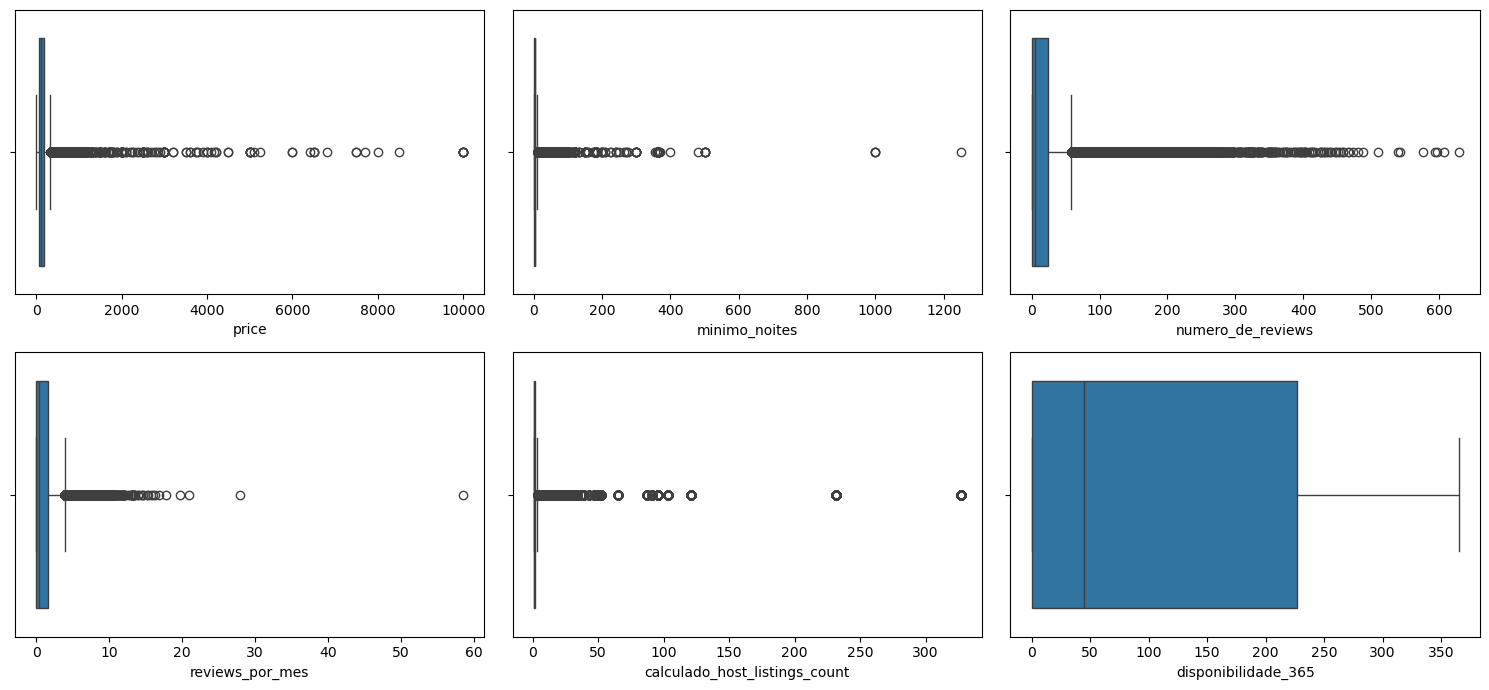

In [54]:
colunas_numericas = ['price', 'minimo_noites', 'numero_de_reviews', 
                     'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, coluna in enumerate(colunas_numericas):
    ax = fig.add_subplot(2, 3, num+1)
    ax = sns.boxplot(x=df[coluna])
plt.tight_layout()
plt.show()

### Definindo funções

In [55]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5*amplitude, q3 + 1.5*amplitude

def excluir_outliers(df, nome_coluna): # quero excluir os outliers
    qntd_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna]) # == base_airbnb['price']
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qntd_linhas - df.shape[0]
    return df, linhas_removidas

In [56]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2) #uma linha, duas colunas
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=coluna, kde=True)

def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### price

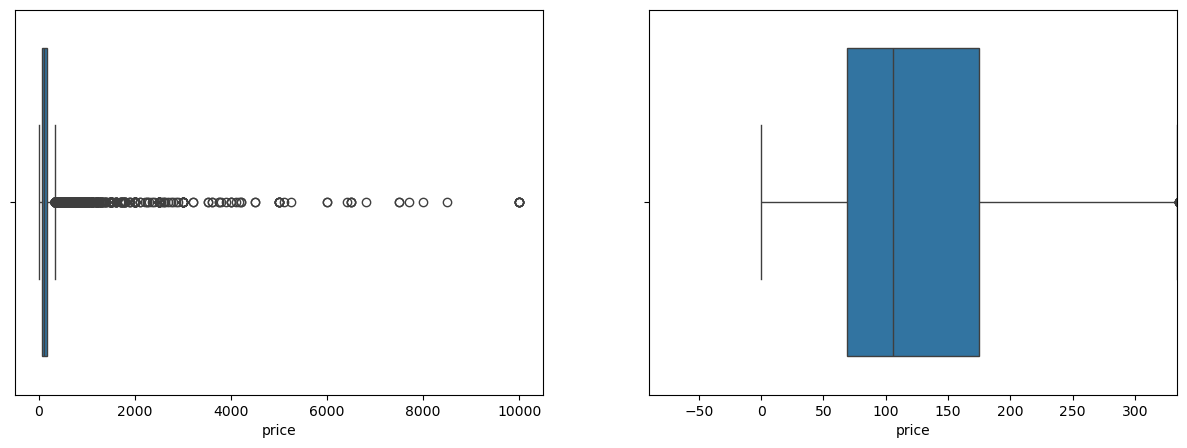

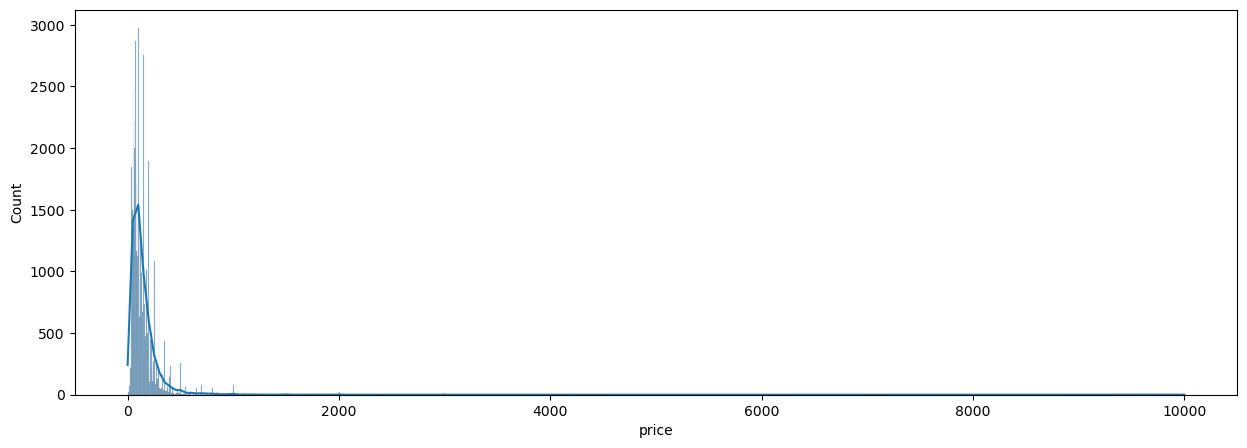

In [57]:
diagrama_caixa(df['price'])
histograma(df['price'])

Os preços se concentram por volta de `U$150.00`, porém há uma variação enorme entre o preço mais baixo, e o mais alto. Tem imóveis por `U$0.00`, e imóveis valendo `U$1000.00`. Para tornar o nosso modelo de previsão melhor, vamos retirar esse outlier.

In [58]:
df.shape

(48857, 16)

In [59]:
df, linhas_removidas = excluir_outliers(df, 'price')

print('{} linhas excluídas.'.format(linhas_removidas))
print(df.shape)

2971 linhas excluídas.
(45886, 16)


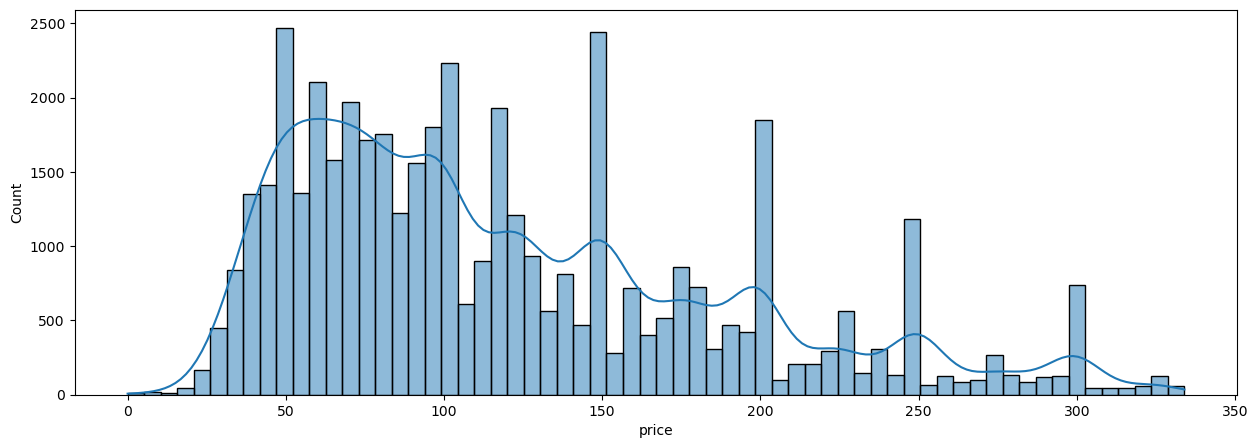

In [60]:
histograma(df['price'])

### Demonstração gráfica - Diferença dos preços em New York

<Figure size 1000x500 with 0 Axes>

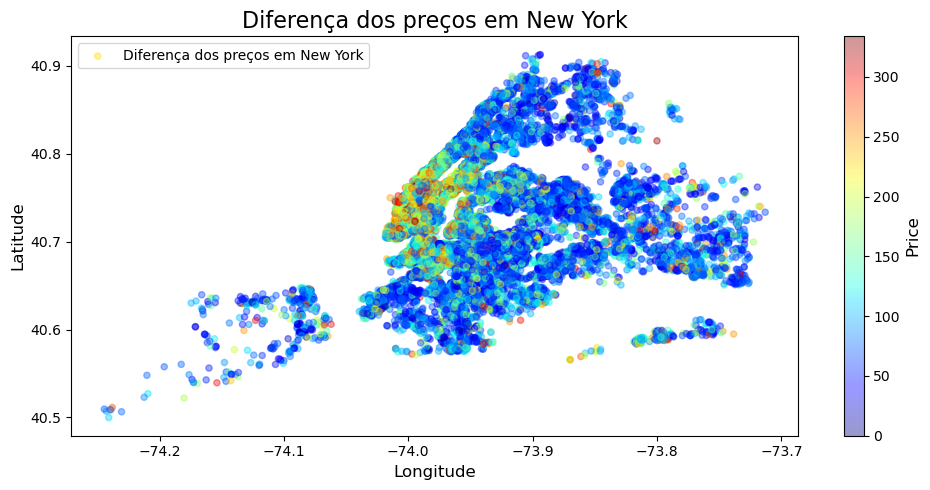

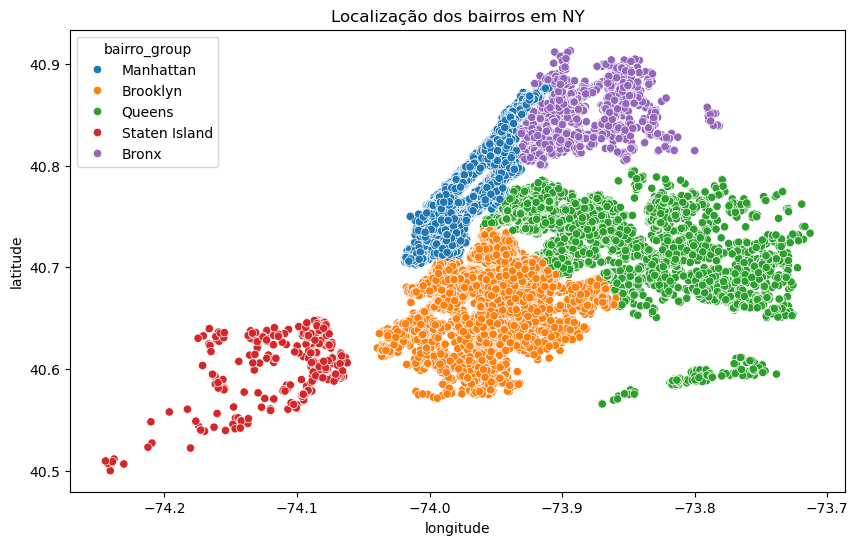

In [61]:
plt.figure(figsize=(10, 5))

# Create the scatter plot
viz_4 = df.plot(kind='scatter', x='longitude', y='latitude', label='Diferença dos preços em New York', c='price',
                cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

# Set plot title and labels
plt.title('Diferença dos preços em New York', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Adjust colorbar
colorbar = viz_4.collections[0].colorbar
colorbar.set_label('Price', fontsize=12)

# Show the plot
plt.legend()
plt.tight_layout()
plt.ioff()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue="bairro_group", data=df)
plt.title("Localização dos bairros em NY")
plt.ion()

### calculado_host_listings_count

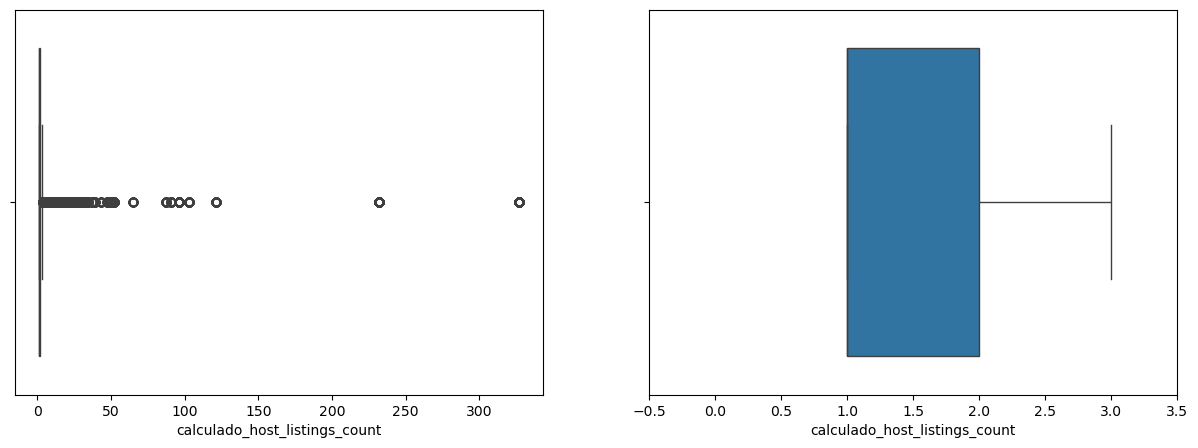

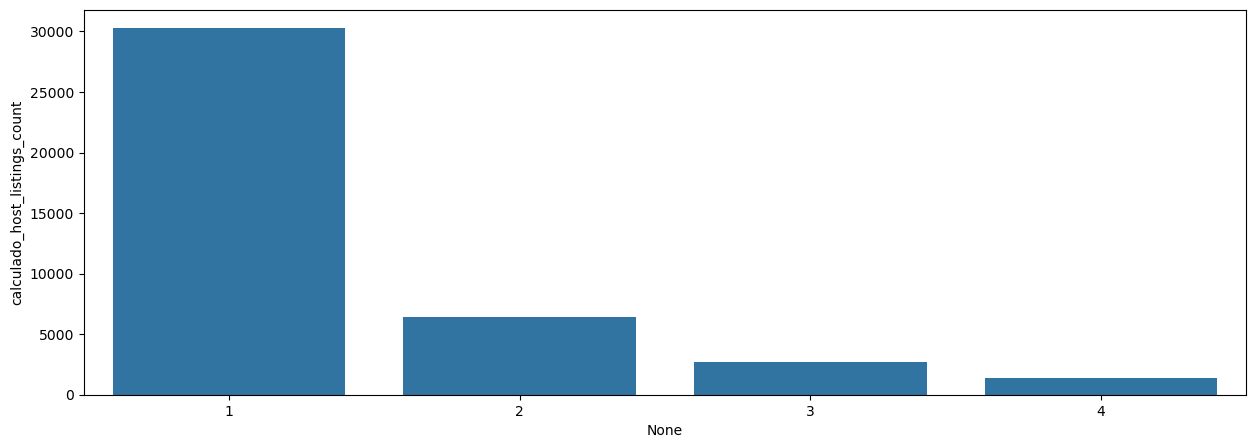

In [62]:
diagrama_caixa(df['calculado_host_listings_count'])
grafico_barra(df['calculado_host_listings_count'])

In [63]:
df, linhas_removidas = excluir_outliers(df, 'calculado_host_listings_count')

print('{} linhas excluídas.'.format(linhas_removidas))
print(df.shape)

6500 linhas excluídas.
(39386, 16)


### Número de avaliações

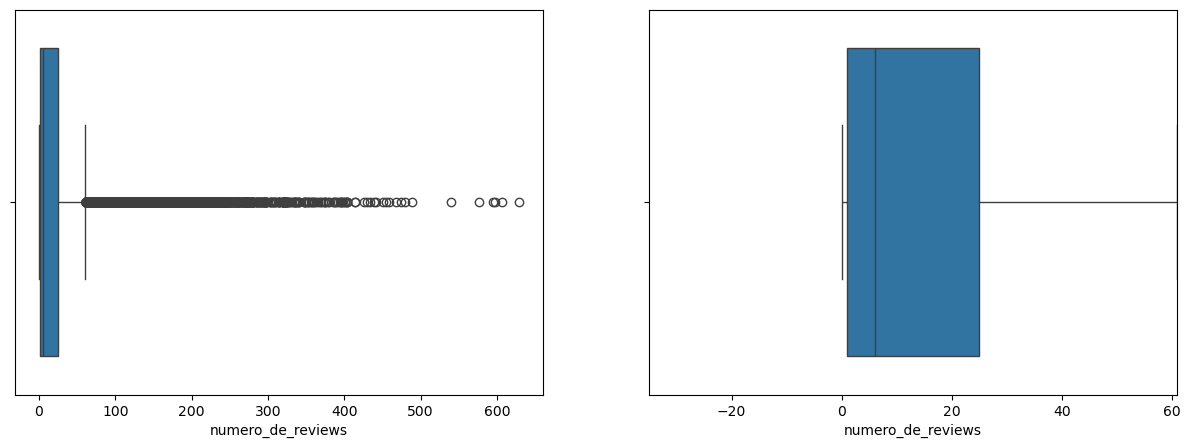

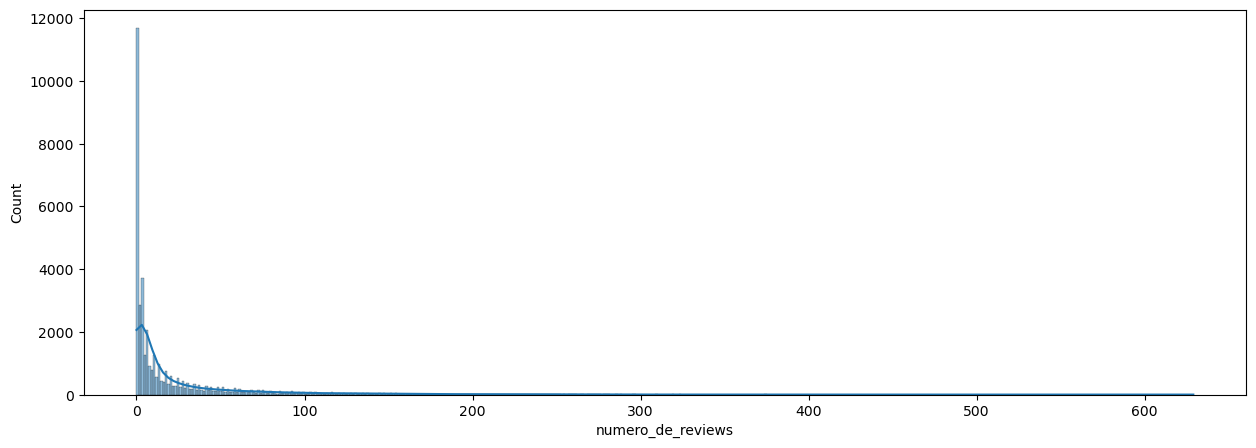

In [64]:
diagrama_caixa(df['numero_de_reviews'])
histograma(df['numero_de_reviews'])

In [65]:
df, linhas_removidas = excluir_outliers(df, 'numero_de_reviews')

print('{} linhas excluídas.'.format(linhas_removidas))
print(df.shape)

4831 linhas excluídas.
(34555, 16)


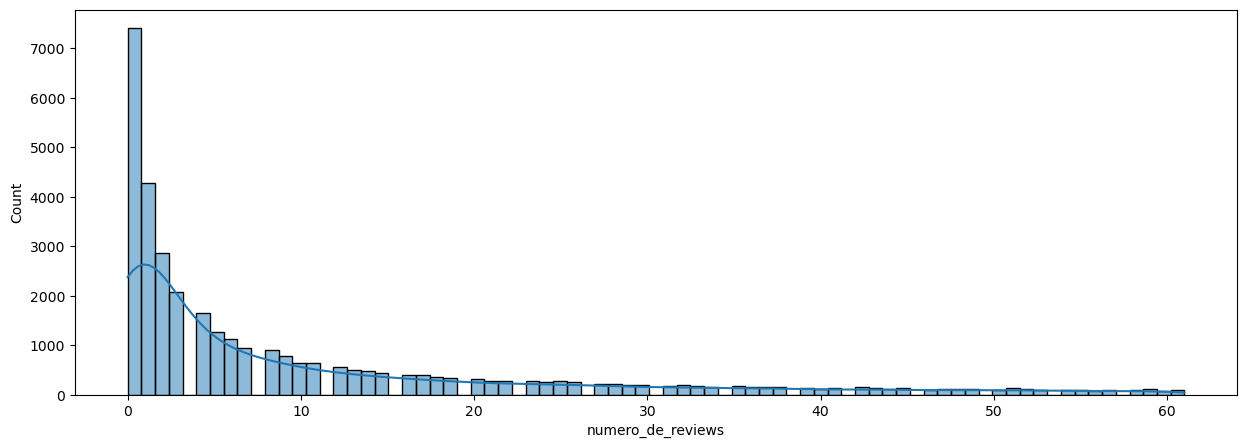

In [66]:
histograma(df['numero_de_reviews'])

In [67]:
df.shape

(34555, 16)

### Mínimo de noites

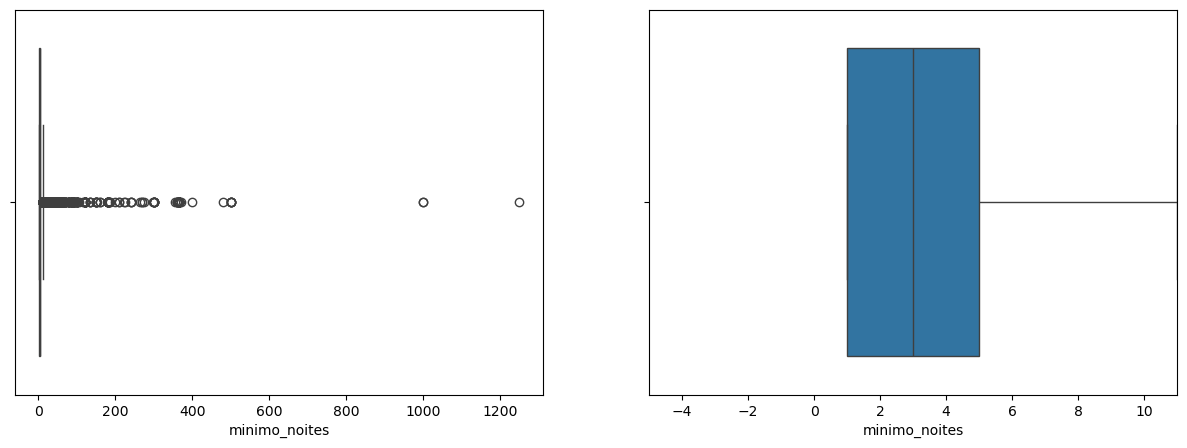

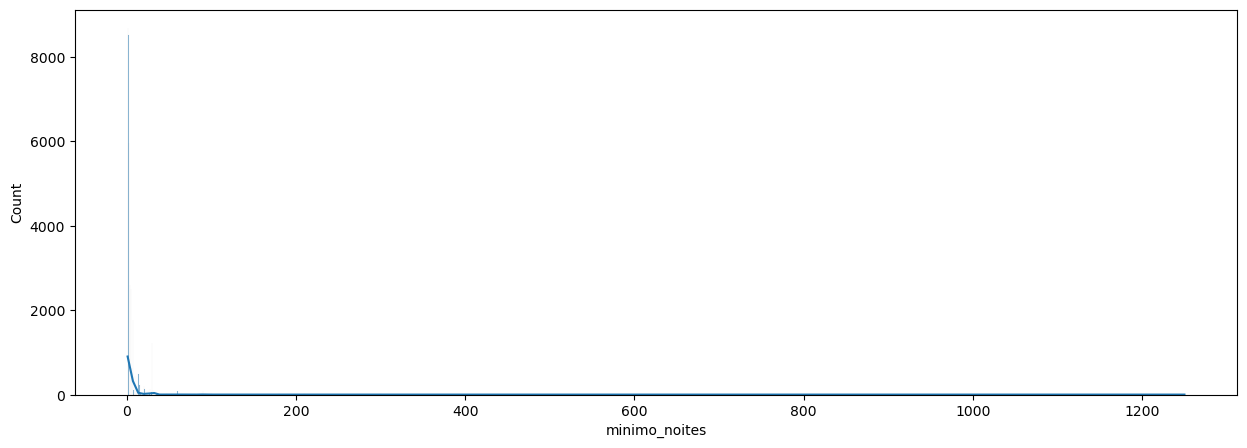

In [68]:
diagrama_caixa(df['minimo_noites'])
histograma(df['minimo_noites'])

In [69]:
df, linhas_removidas = excluir_outliers(df, 'minimo_noites')

print('{} linhas excluídas.'.format(linhas_removidas))
print(df.shape)

3295 linhas excluídas.
(31260, 16)


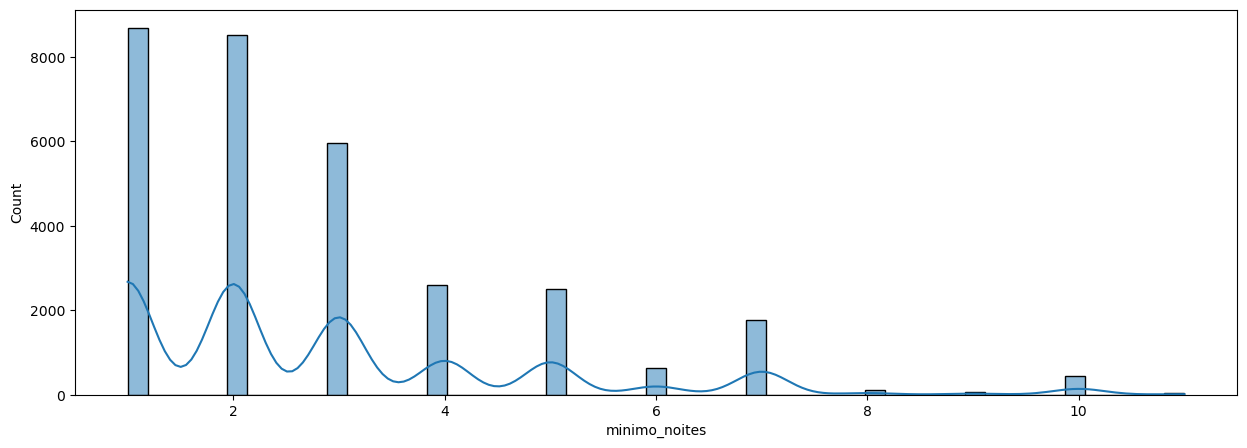

In [70]:
histograma(df['minimo_noites'])

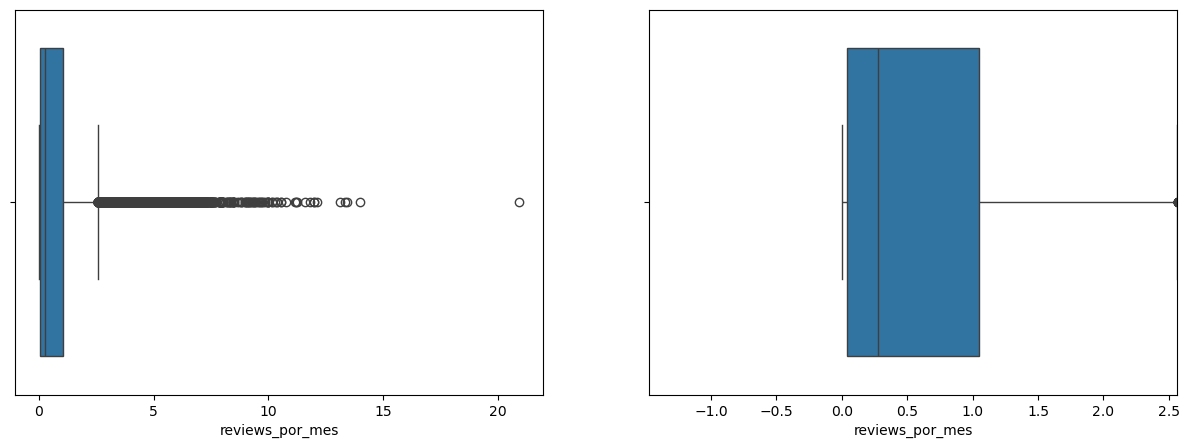

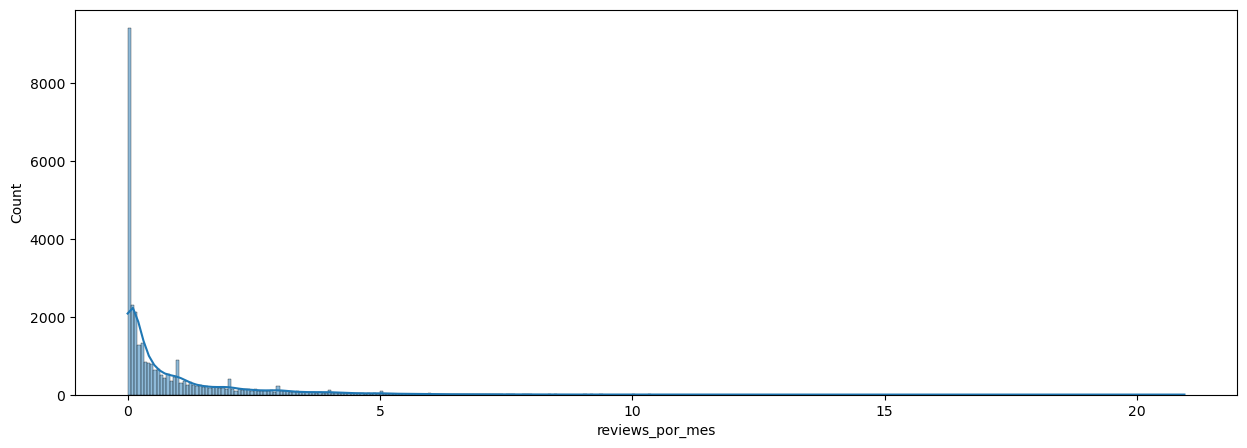

In [71]:
diagrama_caixa(df['reviews_por_mes'])
histograma(df['reviews_por_mes'])

In [72]:
df, linhas_removidas = excluir_outliers(df, 'reviews_por_mes')

print('{} linhas excluídas.'.format(linhas_removidas))
print(df.shape)

3117 linhas excluídas.
(28143, 16)


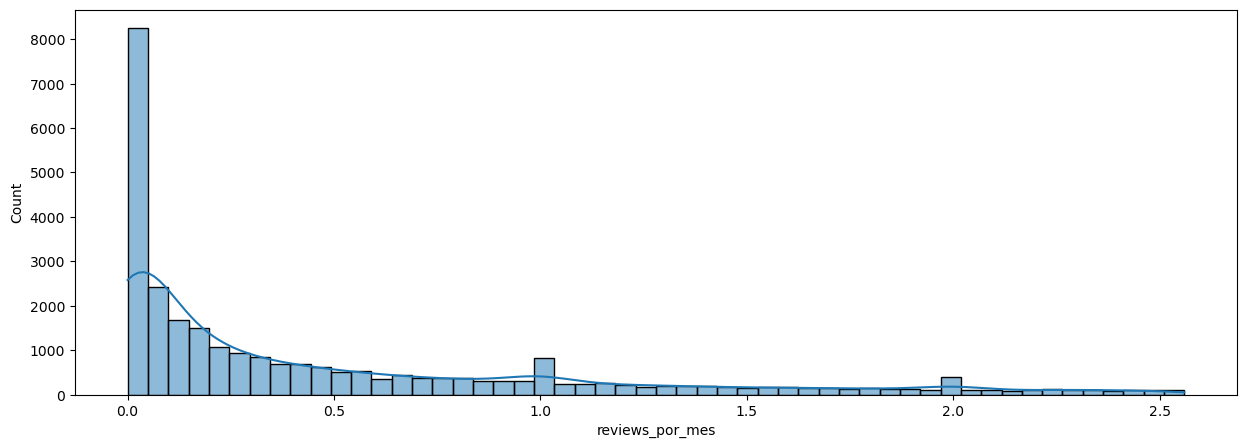

In [73]:
histograma(df['reviews_por_mes'])

## Encoding dos dados

- Colunas com alta cardinalidade como id, nome, host_id, host_name não vão ajudar no modelo.

In [74]:
df_modelo = df.copy()

In [75]:
df_modelo = df.drop(['nome', 'host_id', 'host_name', 'ultima_review'], axis=1)
display(df_modelo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28143 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             28143 non-null  int64  
 1   bairro_group                   28143 non-null  object 
 2   bairro                         28143 non-null  object 
 3   latitude                       28143 non-null  float64
 4   longitude                      28143 non-null  float64
 5   room_type                      28143 non-null  object 
 6   price                          28143 non-null  int64  
 7   minimo_noites                  28143 non-null  int64  
 8   numero_de_reviews              28143 non-null  int64  
 9   reviews_por_mes                28143 non-null  float64
 10  calculado_host_listings_count  28143 non-null  int64  
 11  disponibilidade_365            28143 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usag

None

### Colunas de texto

In [76]:
colunas_texto = df_modelo.select_dtypes(include=['object'])
display(colunas_texto)

,bairro_group,bairro,room_type
0,Manhattan,Midtown,Entire home/apt
1,Manhattan,Harlem,Private room
3,Manhattan,East Harlem,Entire home/apt
9,Manhattan,Upper West Side,Entire home/apt
18,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48888,Queens,Jamaica,Private room
48889,Brooklyn,Bedford-Stuyvesant,Private room
48890,Brooklyn,Bushwick,Private room
48891,Manhattan,Harlem,Entire home/apt


### Transformando colunas de texto em colunas numéricas
- Para a coluna **"bairro"** será utilizado o `Label Encoding`, ele atribui um número inteiro único para cada valor da variável categórica.


- Com as colunas **"bairro_group"** e **"room_type"** vou atribuir o Label Encoding `manualmente`, mas para otimizar irei fazer isso de acordo com a ordem decrescente da média dos preços.

In [77]:
ordem_bairros = df_modelo['bairro'].value_counts().sort_values(ascending=False)
display(ordem_bairros)

Williamsburg                  2720
Bedford-Stuyvesant            2102
Harlem                        1633
Bushwick                      1566
East Village                  1201
                              ... 
Bay Terrace, Staten Island       1
Rossville                        1
Co-op City                       1
New Dorp                         1
Eltingville                      1
Name: bairro, Length: 216, dtype: int64

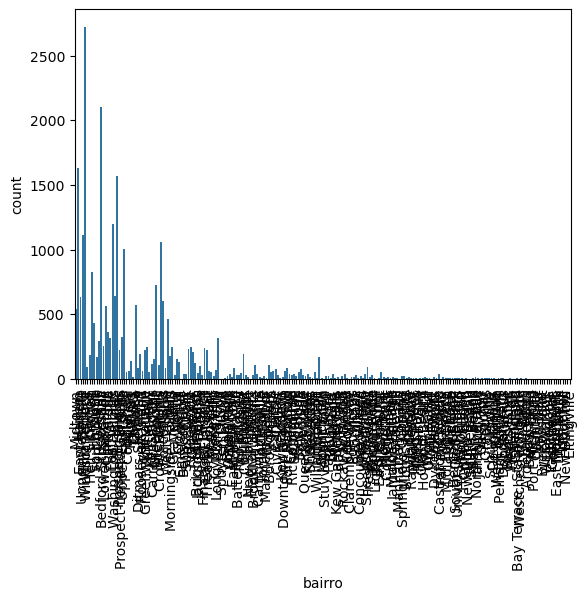

In [78]:
sns.countplot(x=df_modelo['bairro'], data=df_modelo)
plt.xticks(rotation=90)
plt.show()

In [79]:
colunas_menor_200 = []
for bairro in ordem_bairros.index:
    if ordem_bairros[bairro]<=200:
        colunas_menor_200.append(bairro)
        
for tipo in colunas_menor_200:
    df_modelo.loc[df_modelo['bairro']==tipo, 'bairro'] = 'Outros'
print(df_modelo['bairro'].value_counts().sort_values(ascending=False))

Outros                       5743
Williamsburg                 2720
Bedford-Stuyvesant           2102
Harlem                       1633
Bushwick                     1566
East Village                 1201
Upper West Side              1115
Crown Heights                1058
Upper East Side              1002
Hell's Kitchen                829
Greenpoint                    726
Washington Heights            643
East Harlem                   635
Astoria                       607
Chelsea                       569
Lower East Side               564
Midtown                       541
West Village                  466
Flatbush                      431
Clinton Hill                  362
Prospect-Lefferts Gardens     327
Park Slope                    321
Long Island City              319
Fort Greene                   298
Kips Bay                      257
Morningside Heights           251
Ridgewood                     251
Greenwich Village             249
Financial District            241
Sunset Park   

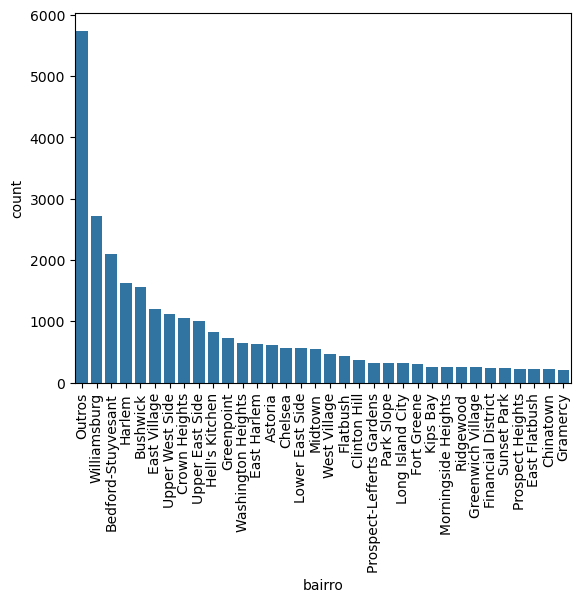

In [80]:
sns.countplot(x=df_modelo['bairro'], data=df_modelo, order=df_modelo['bairro'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [81]:
lista_bairros = []
ordem_bairros = df_modelo['bairro'].value_counts().sort_values(ascending=False)
for bairro in ordem_bairros.index:
    lista_bairros.append(bairro)
print(lista_bairros)

['Outros', 'Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'East Village', 'Upper West Side', 'Crown Heights', 'Upper East Side', "Hell's Kitchen", 'Greenpoint', 'Washington Heights', 'East Harlem', 'Astoria', 'Chelsea', 'Lower East Side', 'Midtown', 'West Village', 'Flatbush', 'Clinton Hill', 'Prospect-Lefferts Gardens', 'Park Slope', 'Long Island City', 'Fort Greene', 'Kips Bay', 'Morningside Heights', 'Ridgewood', 'Greenwich Village', 'Financial District', 'Sunset Park', 'Prospect Heights', 'East Flatbush', 'Chinatown', 'Gramercy']


In [82]:
for nome in lista_bairros:
    df_modelo.loc[df_modelo['bairro']==nome, 'bairro']
display(df_modelo)

,id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
9,5295,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6
18,7750,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0.00,2,249
...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484363,Queens,Outros,40.69137,-73.80844,Private room,65,1,0,0.00,2,163
48889,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48890,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48891,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27


### Label Enconding - Coluna "bairro"

In [83]:
le = LabelEncoder()

df_modelo['bairro'] = le.fit_transform(df_modelo['bairro'])
df_modelo.head()

,id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Manhattan,21,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,3647,Manhattan,16,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,5022,Manhattan,8,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
9,5295,Manhattan,30,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6
18,7750,Manhattan,8,40.79685,-73.94872,Entire home/apt,190,7,0,0.00,2,249


### Label Encoding manualmente
- "bairro_group"
- "room_type"

Vou transformar as colunas bairro_group e room_type de acordo com a média dos preços em cada bairro.

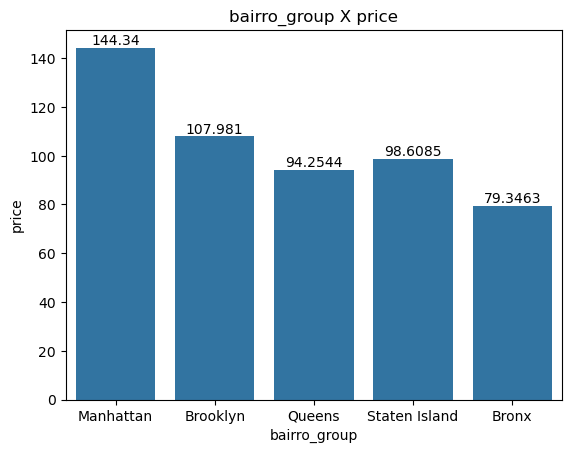

In [84]:
x = sns.barplot(data=df_modelo, x='bairro_group', y='price', errorbar=None)
for container in x.containers:
    x.bar_label(container, fontsize=10)

plt.title('bairro_group X price')
plt.show()

In [85]:
price_bairro = (
    df_modelo
    .groupby('bairro_group')
    .agg({'price': 'mean'})
    .sort_values(by='price', ascending=False)
)
price_bairro

,price
bairro_group,
Manhattan,144.339818
Brooklyn,107.980902
Staten Island,98.608466
Queens,94.254377
Bronx,79.346350


In [86]:
df_modelo['bairro_group'] = df_modelo['bairro_group'].map({'Manhattan': 1,
                                                           'Brooklyn': 2,
                                                           'Staten Island': 3,
                                                           'Queens': 4,
                                                           'Bronx': 5})

df_modelo['room_type'] = df_modelo['room_type'].map({'Entire home/apt': 1,
                                                     'Private room': 2,
                                                     'Shared room': 3})

In [87]:
correlacao = df_modelo.corr()
print(correlacao['price'].sort_values(ascending=False))

price                            1.000000
bairro                           0.113904
latitude                         0.048253
minimo_noites                    0.046064
disponibilidade_365              0.036777
numero_de_reviews                0.013691
reviews_por_mes                  0.001790
id                              -0.018743
calculado_host_listings_count   -0.113037
bairro_group                    -0.268652
longitude                       -0.292210
room_type                       -0.593897
Name: price, dtype: float64


#### Salvando um modelo teste para usar depois no nosso sistema de previsão.

In [139]:
modelo_teste = df_modelo.drop('price', axis=1)
modelo_teste.to_csv('tabela_testes_id.csv', index=False)

##  Modelo de Previsão
- Estamos lidando com um problema de regressão.

- Escolha dos modelos a serem testados
    1. Random Forest
    2. LinearRegression
    3. Extra Tree


In [90]:
y = df_modelo['price']
X = df_modelo.drop(['price', 'id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## Padronizando os dados

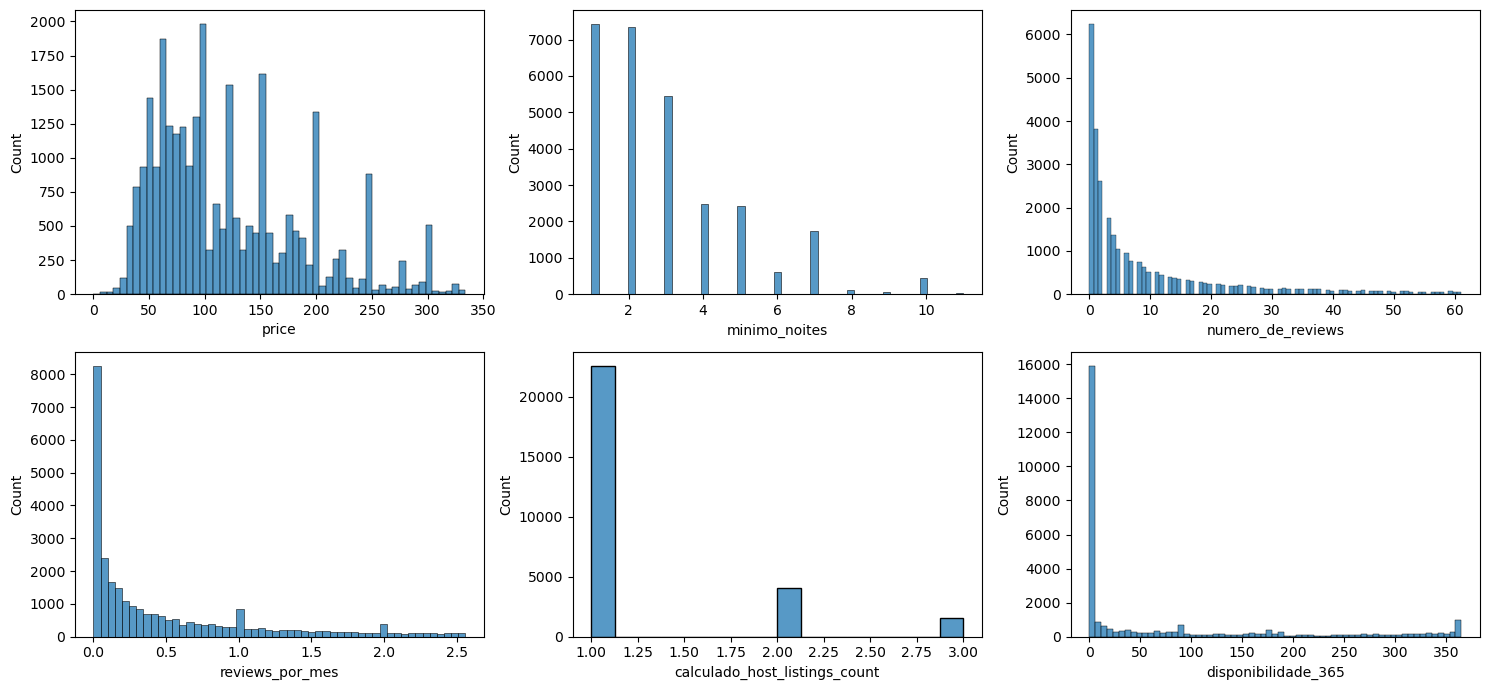

In [91]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, coluna in enumerate(colunas_numericas):
    ax = fig.add_subplot(2, 3, num+1)
    ax = sns.histplot(x=df[coluna])
plt.tight_layout()
plt.show()

In [92]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
X_train

array([[ 2.10625819, -1.65115596,  0.59960548, ...,  0.06852098,
        -0.46399863, -0.14436547],
       [ 0.1338157 ,  1.45837553, -0.18120801, ...,  1.59504299,
        -0.46399863, -0.42868636],
       [-0.85240554, -0.14350433,  1.81153419, ...,  0.88802227,
         1.36014286,  2.56556803],
       ...,
       [ 0.1338157 ,  1.45837553, -0.39766228, ..., -0.78311762,
        -0.46399863, -0.60638691],
       [-0.85240554, -0.80310192, -0.05495797, ..., -0.0760969 ,
        -0.46399863,  0.03333509],
       [ 0.1338157 ,  1.45837553, -0.25060967, ..., -0.3814013 ,
        -0.46399863, -0.59750189]])

In [94]:
X_test

array([[ 0.1338157 , -1.0857866 , -1.0448731 , ...,  1.83607278,
        -0.46399863, -0.20656066],
       [-0.85240554,  0.23340858, -0.16004679, ..., -0.78311762,
        -0.46399863,  2.52114289],
       [ 2.10625819,  0.51609326,  0.17297358, ...,  0.7755417 ,
        -0.46399863,  0.38873621],
       ...,
       [ 0.1338157 ,  1.45837553, -0.40734624, ..., -0.62243109,
        -0.46399863, -0.60638691],
       [-0.85240554, -0.14350433,  1.52334694, ..., -0.71884301,
        -0.46399863, -0.60638691],
       [-0.85240554,  0.51609326, -0.3137347 , ..., -0.78311762,
        -0.46399863, -0.60638691]])

### Modelos de previsão

In [95]:
rf = RandomForestRegressor()
lr = LinearRegression()
et = ExtraTreesRegressor()

modelos = {'RandomForestRegressor': rf,
           'LinearRegression': lr,
           'ExtraTreesRegressor': et,
          }

for nome, modelo in modelos.items():
    # treinar
    print(f'Modelo {nome}:')
    modelo.fit(X_train, y_train)
    print(f'Treino score: {modelo.score(X_train, y_train)}')
    print(f'Teste score: {modelo.score(X_test, y_test)}')
    # testar
    y_pred = modelo.predict(X_test)
    print(f'y_pred: {r2_score(y_test, y_pred)*100}\n')

Modelo RandomForestRegressor:
Treino score: 0.9310131475382178
Teste score: 0.5060366832205845
y_pred: 50.60366832205845

Modelo LinearRegression:
Treino score: 0.4262449123128461
Teste score: 0.4345371812234723
y_pred: 43.453718122347226

Modelo ExtraTreesRegressor:
Treino score: 0.9999941134331577
Teste score: 0.4780732350682959
y_pred: 47.80732350682959



- O melhor modelo é o LinearRegression. Tanto o modelo RandomForestRegressor quanto o ExtraTreesRegressor sofrem de overfitting de dados, a diferença do resultado do treino e do teste são significativas.

https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

### Ridge Regression Model

In [96]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train, y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.4262448024838128
The test score for ridge model is 0.434530259382894


## XGBRegressor
### `GridSearchCV` - método de otimização

In [97]:
xgb = xgboost.XGBRegressor()

In [98]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [99]:
xgb_model = xgboost.XGBRegressor(n_estimators=500, max_depth=3, booster='gbtree', 
                                 learning_rate=0.05, n_jobs=8)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=8,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
score = xgb_model.score(X_train, y_train)
score

0.5620830181361922

In [101]:
score = xgb_model.score(X_test, y_test)
score

0.5413397021815376

In [102]:
y_pred = xgb_model.predict(X_test)

In [103]:
r2_score(y_test, y_pred)

0.5413397021815376

In [104]:
resultado = pd.DataFrame({'Predicted Price': y_pred, 'True Price': y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
resultado['Difference'] = resultado['True Price'] - resultado['Predicted Price']

# Display the results
display(resultado.head(20))

,Predicted Price,True Price,Difference
27604,131.893005,90,-41.893005
48066,133.120026,120,-13.120026
18760,80.139114,76,-4.139114
42680,144.288849,110,-34.288849
40490,83.904259,70,-13.904259
24140,144.341888,126,-18.341888
577,165.126648,172,6.873352
1491,67.154922,70,2.845078
9949,64.733345,80,15.266655
41817,94.627991,90,-4.627991


### Visualização gráfica das previsões

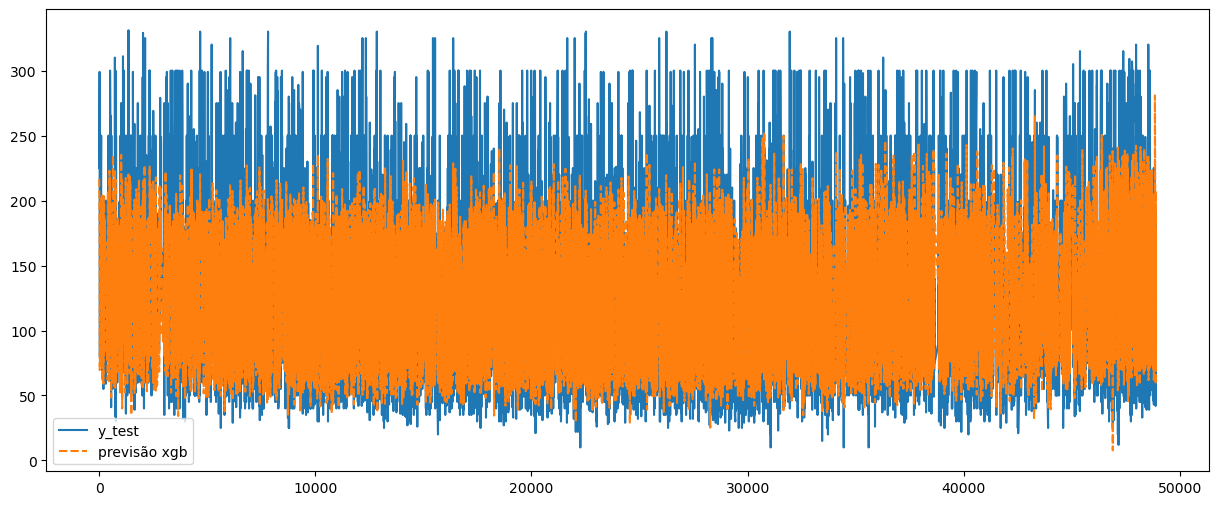

In [105]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_test'] = y_test
tabela_auxiliar['previsão xgb'] = y_pred

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

## Construindo um Sistema de Previsão simples

In [265]:
X.to_csv('dados_teste.csv', index=False) #para usar no nosso input_data - sistema simples de previsão

In [143]:
df_modelo.head(10)

,id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,1,21,40.75362,-73.98377,1,225,1,45,0.38,2,355
1,3647,1,16,40.80902,-73.94190,2,150,3,0,0.00,1,365
3,5022,1,8,40.79851,-73.94399,1,80,10,9,0.10,1,0
9,5295,1,30,40.80316,-73.96545,1,135,5,53,0.43,1,6
18,7750,1,8,40.79685,-73.94872,1,190,7,0,0.00,2,249
19,7801,2,33,40.71842,-73.95718,1,299,3,9,0.07,1,0
24,8505,2,23,40.65599,-73.97519,2,60,1,19,1.37,2,85
25,8700,1,23,40.86754,-73.92639,2,80,4,0,0.00,1,0
26,9357,1,17,40.76715,-73.98533,1,150,10,58,0.49,1,75
37,11943,2,11,40.63702,-73.96327,2,150,1,0,0.00,1,365


In [108]:
input_data = (1,21,40.75362,-73.98377,1,1,45,0.38,2,355)

# mudando o input_data para numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = xgb_model.predict(std_data)
print(prediction)

[216.70871]


- Registro das primeiras 7 colunas do nosso dataframe df_modelo:

``` 
original: 225 // previsão: 216.71
original: 150 // previsão: 139.52
original: 80 // previsão: 113.54 - disponibilidade 0
original: 190 // previsão: 184.25
original: 299 // previsão: 172.53 - disponibilidade 0
original: 60 // previsão: 86.29
original: 80 // previsão: 69.56 - disponibilidade 0
original: 150 // previsão: 179.22
original: 150 // previsão: 119.96
```

## Contruindo um modelo mais completo

- Vou pegar as informações pelo ID para resolver a pergunta a seguir. 


    - OBS: Antes disso eu transformei em uma tabela csv, o dataframe "df_modelo", o objetivo era pegar a tabela já com todas as colunas tratadas e transformandas em numéricas, só que ainda com o seu id. Assim, posso pesquisar pelo id e pegar os valores já tratados e passar pelo nosso sistema de previsão simples feito acima. 
    
    
- Obstáculos: bairro_group, bairro, room_type (precisa converter para numérico) 

    ---> teríamos que converter cada coluna em numérico\
    ---> esse seria um dos obstáculos, mas foi resolvido pela solução acima. 

## 4. Supondo um apartamento com as seguintes características:

`{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}`

Qual seria a sua sugestão de preço?


O preço seria de $216.71

In [262]:
tabela = pd.read_csv('tabela_testes_id.csv')
id = int(input("Insira o ID: "))
chave = tabela.loc[tabela['id']==id, :]
display(chave)

dic = chave.to_dict('records')
lista = []
for elemento in dic:
    print(elemento)
    
    for coluna, valor in elemento.items():
        lista.append(valor)

input_data = lista[1:]
print(input_data)

# mudando o input_data para numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = xgb_model.predict(std_data)
print(f"A sugestão de preço seria de: {prediction}")

Insira o ID: 2595


,id,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,1,21,40.75362,-73.98377,1,1,45,0.38,2,355


{'id': 2595, 'bairro_group': 1, 'bairro': 21, 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 1, 'minimo_noites': 1, 'numero_de_reviews': 45, 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}
[1, 21, 40.75362, -73.98377, 1, 1, 45, 0.38, 2, 355]
A sugestão de preço seria de: [216.70871]


## Salvando o nosso modelo

In [263]:
import pickle
from pickle import dump

In [264]:
# salvando o modelo
pickle.dump(xgb_model, open('xgb_model.sav', 'wb'))
# salvando o nosso padronizador
pickle.dump(scaler, open('scaler.sav', 'wb'))